In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
%matplotlib inline

from scipy.interpolate import interp1d

from IPython.display import Image

## Details

Below are the recorded measurements for the first batch of cutout factor measurements

## Ionisation conversion

The following cell is used to initialise the ionisation to dose conversion function. Data is extracted from table 20 within TRS398. R50 of the 12 MeV beam is $4.75~g/cm^2$

In [2]:
zOnR50 = np.concatenate((np.array([0.02]), np.arange(0.05,1.25,0.05)))
R50of45 = np.array([0.997,1,1.004,1.008,1.012,1.017,1.021,1.026,1.03,
                 1.035,1.04,1.045,1.051,1.056,1.062,1.067,1.073,1.08,
                 1.086,1.092,1.099,1.106,1.113,1.120,1.128])

R50of50 = np.array([0.991,0.994,0.998,1.002,1.006,1.011,1.016,1.02,1.025,
                 1.03,1.035,1.041,1.046,1.052,1.058,1.064,1.07,1.076,
                 1.083,1.09,1.097,1.104,1.112,1.119,1.128])

R50of47_5 = np.mean([R50of45,R50of50], axis=0)

stopRatio = interp1d(zOnR50 * 47.5,R50of47_5)

## Measurements

These measurements were done on Harry 2694, with a Markus chamber set to +300 V. The sensitivity was $1.398 \times 10^9$. All measurements were done at 100 SSD with a 12 MeV beam and a $10\times10$ cm applicator. Below are the readings recorded in chronological order.

### Readings

#### Output function definition

In [3]:
def calc_display(**kwargs):
    depth = np.array(kwargs['depth'])
    ionisation = np.array(kwargs['ionisation'])
    reference = kwargs['reference']
    
    if len(ionisation) == 1:
        factor = (
            reference / ionisation * 
            (stopRatio(25) / stopRatio(depth[0]))
        )
        
    else:    
        stop_ratio_corrected = stopRatio(depth) * ionisation

        plt.scatter(depth,stop_ratio_corrected)
        plt.ylabel('Stopping power ratio corrected')
        plt.xlabel('Depth (mm)')
        plt.title('Relative dose measurements')
        plt.show()
        
        index_of_max = np.argmax(stop_ratio_corrected)        
        cutout_reading = ionisation[index_of_max]
        
        factor = (
            (reference / cutout_reading) * 
            (stopRatio(25) / stopRatio(depth[index_of_max]))
        )
    
    print(
        "Cutout factor = %0.3f | %0.1f%%" % 
        (factor, (factor - 1) * 100)
    )

    return factor

#### Cutout readings

In [4]:
data = dict()

In [13]:
# Standard insert
np.mean([1.033, 1.033])

1.0329999999999999

In [8]:
def new_reading(**kwargs):
    data = kwargs['data']
    key = kwargs['key']
    ionisation = kwargs['ionisation']
    depth = kwargs['depth']
    
    data[key]['depth'].append(depth)
    data[key]['ionisation'].append(np.mean(ionisation))
    
    return data

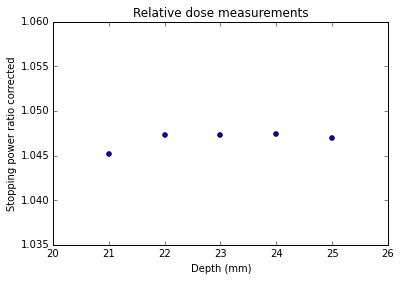

Cutout factor = 1.026 | 2.6%


In [9]:
key = 'concave_cutout'

data[key] = dict()

data[key]['depth'] = []
data[key]['ionisation'] = []
data[key]['reference'] = 1.033

data = new_reading(
    key=key, data=data,
    ionisation=[1.007, 1.006, 1.006],
    depth=25    
)

data = new_reading(
    key=key, data=data,
    ionisation=[1.009, 1.009],
    depth=24   
)

data = new_reading(
    key=key, data=data,
    ionisation=[1.011, 1.011],
    depth=23 
)

data = new_reading(
    key=key, data=data,
    ionisation=[1.013],
    depth=22
)

data = new_reading(
    key=key, data=data,
    ionisation=[1.013],
    depth=21
)

data[key]['factor'] = calc_display(**data[key])

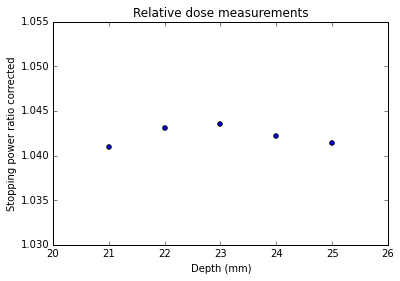

Cutout factor = 1.030 | 3.0%


In [10]:
key = 'concave_ellipse'
data[key] = dict()
data[key]['depth'] = []
data[key]['ionisation'] = []
data[key]['reference'] = 1.033

data = new_reading(
    key=key, data=data,
    ionisation=[1.001, 1.001],
    depth=25    
)

data = new_reading(
    key=key, data=data,
    ionisation=[1.004, 1.004],
    depth=24    
)

data = new_reading(
    key=key, data=data,
    ionisation=[1.008, 1.007, 1.007],
    depth=23   
)

data = new_reading(
    key=key, data=data,
    ionisation=[1.009, 1.009],
    depth=22   
)

data = new_reading(
    key=key, data=data,
    ionisation=[1.009],
    depth=21   
)

data[key]['factor'] = calc_display(**data[key])

In [12]:
# Standard insert
np.mean([1.033, 1.033])

1.0329999999999999